In [1]:
import pandas  as pd
import numpy as np

In [2]:
df = pd.read_csv('quikr_car.csv')

In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [5]:
df = df[df['company'].str.isalpha()]

In [6]:
df = df[df['year'].str.isnumeric()]

In [7]:
df['year'] = df['year'].astype(int)

In [8]:
df['Price'] = df['Price'].str.replace(',','')

In [9]:
df = df[df['Price'].str.isnumeric()]
df['Price'] = df['Price'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [11]:
df['kms_driven'] = df['kms_driven'].str.split(' ').str.get(0)

In [12]:
df['kms_driven'] = df['kms_driven'].str.replace(',','')

In [13]:
df = df[df['kms_driven'].str.isnumeric()]

In [14]:
df['kms_driven'] = df['kms_driven'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [16]:
df['fuel_type'].fillna(value=df['fuel_type'].mode().iloc[0],inplace=True)

In [17]:
import seaborn as sns

<Axes: >

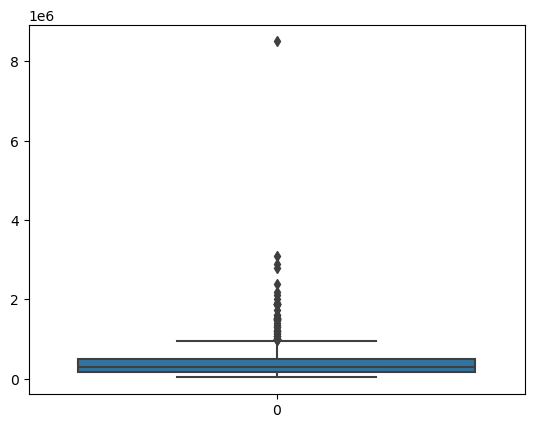

In [18]:
sns.boxplot(df['Price'])

## Remove Outliers

In [19]:
df[df['Price']>6000000]

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [20]:
df = df[df['Price']<6000000]

In [21]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [22]:
df = df.reset_index(drop=True)

In [23]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [32]:
X = df.drop(columns=['Price'])

In [33]:
#df.to_csv('clean_car.csv',index=False)
pd.read_csv('clean_car.csv').head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [34]:
y = df['Price']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=651)

In [65]:
print(X_train,X_test,y_train,y_test)

                     name   company  year  kms_driven fuel_type
402     Hyundai Grand i10   Hyundai  2014       35000    Petrol
678     Audi A3 Cabriolet      Audi  2015       12516    Petrol
528      BMW X1 xDrive20d       BMW  2011       72000    Diesel
383  Maruti Suzuki Ertiga    Maruti  2013       90000    Diesel
377     Hyundai Elite i20   Hyundai  2015       20000    Diesel
..                    ...       ...   ...         ...       ...
44             Honda City     Honda  2015       55000    Petrol
384            Honda City     Honda  2000       80000    Petrol
200    Maruti Suzuki Alto    Maruti  2010       34580    Petrol
666    Maruti Suzuki Omni    Maruti  2009       56000    Petrol
223     Mercedes Benz GLA  Mercedes  2015       20000    Diesel

[734 rows x 5 columns]                             name     company  year  kms_driven fuel_type
139  Volkswagen Polo Comfortline  Volkswagen  2015        2800    Petrol
148                Ford EcoSport        Ford  2017       39000

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [66]:
trf1 = ColumnTransformer([('one_col',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,-1])],remainder='passthrough')

In [67]:
trf2 = ColumnTransformer([('sca_col',MinMaxScaler(),slice(0,-1))],remainder='passthrough')

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [69]:
trf3 = LinearRegression()

In [70]:
pipe = Pipeline([('trf1',trf1),
                ('trf2',trf2),
                ('trf3',trf3)])

In [71]:
pipe.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_col',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, -1])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sca_col', MinMaxScaler(),
                                                  slice(0, -1, None))])),
                ('trf3', LinearRegression())])

In [72]:
pipe.score(X_test,y_test)

0.739197358361156

In [73]:
round(pipe.predict([['Ford Figo','Ford',2012,41000,'Diesel']])[0],2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


175000.0

In [74]:
import pickle
pickle.dump(pipe,open('pipe1.pkl','wb'))